<a href="https://colab.research.google.com/github/imhyunho99/2023-1--Deaplearning_Framework/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%EB%8B%A8%EC%88%9C_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_%ED%95%99%EC%8A%B5%EC%8B%9C%EC%BC%9C_%EB%B3%B8_%EA%B2%B0%EA%B3%BC%EC%99%80_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 왜 컨볼루셔널 인공신경망이 필요할까? (Why Convolutional Neural Network?)
- MNIST data
- 인공신경망 만으로 어느정도 성능이 나오는지 확인해보자
- 5.6 기본적인 합성곱 신경망 실습을 먼저보고 이 파일을 보시면 됩니다.

In [ ]:
# 파이토치 및 토치비젼 설치
# 런타임을 GPU 모드로 바꿔서 실행하세요
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Setting
### 1) Import Required Libraries

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

### 2) Set hyperparameters

In [ ]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

## 3. Data Generation

### 1) Download Data

In [ ]:
mnist_train = dset.MNIST("../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 101499979.85it/s]


Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 95307390.89it/s]


Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25972935.28it/s]


Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19761959.30it/s]


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



### 2) Check Dataset

In [ ]:
print(mnist_train.__getitem__(0)[1], mnist_train.__len__())#[0] ==> image, [1] ==> label
mnist_test.__getitem__(0)[1], mnist_test.__len__()

5 60000


(7, 10000)

### 3) Set DataLoader

In [ ]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 4. Model & Optimizer

### 1) CNN Model

In [ ]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear,self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(784,300),
            nn.ReLU(),
            nn.Linear(300,100),
            nn.ReLU(),
            nn.Linear(100,10),
            nn.ReLU()
        )       
        
    def forward(self,x):
      #-1: 나머지 차원을 계산하고, 나머지 값, ex) x=512 벡터, out-> 256*2, 만약 x가 700이라면 Batch_size로 나누어 떨어지지 않아 Error corrupt

        out = x.view(batch_size,-1)
        #x : 256*1*28*28
        #out : 256*784, -1대신 28*28해도 되긴하는데 혼남
      
        out = self.layer(out)

        return out

### 2) Loss func & Optimizer

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Linear().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cuda:0


## 5. Train 

In [ ]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(2.3023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5685, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5406, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4542, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3289, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2937, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3716, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4800, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3841, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2659, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
#param_list = list(model.parameters())
#print(param_list)

## 5. Visualize Training Loss

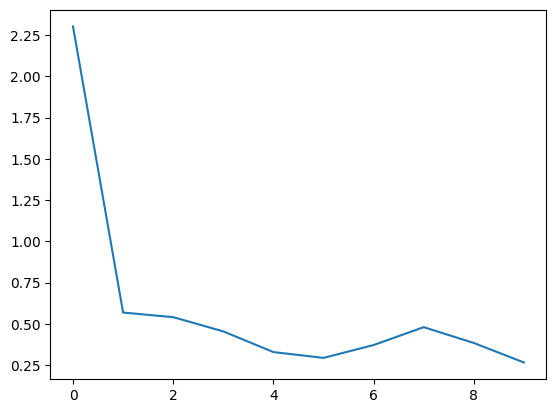

In [ ]:
plt.plot(loss_arr)
plt.show()

## 6. Test

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for image,label in test_loader:
      x = image.to(device)
      y_= label.to(device)

      output = model.forward(x)
      _,output_index = torch.max(output,1)

      total += label.size(0)
      correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data: {}".format(100*correct/total))

Accuracy of Test Data: 88.15103912353516


##이미지 인식에서 위 모델이 보이는 한계



1.   패턴을 인식하거나 학습하지 못함

벡터로 나타내어 학습하기 때문에 패턴을 보지 못한다.

<br/></br>



2.   메모리 효율 저하와 성능의 한계

위 예시는 28*28. 모니터만해도 2Mega Pix, hidden layter는 기하급수적으로 증가






CNN(Convolution Neular Network) ==> 위 한계를 타파


##**CNN(convolutio Neular Network)**



*   커널

Kernel = Filter = Weight

병렬 연산으로 속도 ^, 패턴 파악^


필터의 차원을 높이면 더 많은 병렬 처리 가능, 이미지 처리에 대한 속도 증폭

이렇게 만들어진 특성(Feature)로 만든 행렬(Feature map)


torch.nn.Conv2d(in_channels, out_channels, kernel_size,
stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')

==> 파이토치 2차원 합성곱

<br>
<br>
<br>

*   패딩

커널로 인한 원본 손실 방지 

주변을 n(주로 0)으로 채운다. 커널로 찍어도 값의 손실이 없다.
Feature map 유지


가장자리의 특성이 패턴에 기여하는 정도를 일정하게 해준다. 픽셀간의 불평등 해소.

nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,padding=1)

==> 파이토치 2차원 패딩


<br>
<br>
<br>

*   스트라이드

얼만큼 옆으로 가면서 연산할 것인가.

nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1,stride=5)

==> 파이토치 2차원 스트라이드
<br>

<br>
<br>

*   풀링

특징맵의 축소

정보의 손실이 일어나지만 합성곱 계층이 증가하면 노드 수가 기하급수적으로 증가한다. 어차피 계층이 늘어나면 보완델테니 특징만 살리고 메모리를 낭비하지 말자.

nn.MaxPool2d(kernel_size=2,stride=2)

==> 파이토치 Max pool